In [325]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Import additional packages
from itertools import combinations
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model  # 进行岭回归分析
from ipywidgets import interact
%matplotlib inline

p = 10
n = 20

# 上帝视角下的beta: 截距项为 10，三个变量前的系数分别为 2，3，4
beta = [8]
for i in range(p):
    beta.append((i+1))
beta = np.array(beta)
print('beta: ', beta)

# 构造协方差矩阵
cov = np.zeros((p, p), dtype=float)
for i in range(p):
    cov[i][i] = 1.0
for i in range(p):
    for j in range(p):
        if i != j:
            cov[i][j] = cov [j][i] = 0.999**(i+j)
    
print('cov: ', cov)

# 构造 X 矩阵
# X = [[5.053499791495376, 4.896359188149629, 4.5846019652366765, 3.4627703344989245, 3.270451004372899, 4.493105477608886, 4.4464566375800425, 4.798063216845086, 6.427862171550048, 4.303787732779672]]
# X.append([5.072933009683874, 3.6512177680206648, 5.577820866295013, 4.068646005580284, 5.59613146647269, 6.323457817901293, 6.079773035399383, 2.9443980328330173, 4.457913906178166, 5.357206466723423])
# X = np.random.normal(loc=5 , scale=1, size=(2,n)).tolist()
# X.append([1.1, 1.4, 1.7, 1.7, 1.8, 1.8, 1.9, 2, 2.3, 2.4])
# X.append([2.2, 3, 3.6, 3.4, 3.8, 3.6, 3.6, 4.2, 4.8, 5])
X = np.random.multivariate_normal(np.ones(p), cov, (n, ), 'raise') # raise 用来限定正定性
X = np.column_stack((np.ones(n),X))
# print(X)

# 生成 10 个满足正态分布的 epsilon 值
# epsilon = [ 0.05290865, -0.34306401, -0.5598349, 0.64584319, -0.37267585, -0.87090483, 0.99051878, -1.38493147, 0.06964761, 0.0842377]
epsilon = np.random.normal(loc = 0.0 , scale = 1, size = (1,n))
# print(epsilon)

# 上帝视角下的Y
# Y = X @ beta + epsilon
Y = X @ beta + epsilon[0]
Y = Y.T
# print(Y)

df = pd.DataFrame(X)
df['Y'] = Y
print(df.head())

beta:  [ 8  1  2  3  4  5  6  7  8  9 10]
cov:  [[1.         0.999      0.998001   0.997003   0.996006   0.99500999
  0.99401498 0.99302097 0.99202794 0.99103592]
 [0.999      1.         0.997003   0.996006   0.99500999 0.99401498
  0.99302097 0.99202794 0.99103592 0.99004488]
 [0.998001   0.997003   1.         0.99500999 0.99401498 0.99302097
  0.99202794 0.99103592 0.99004488 0.98905484]
 [0.997003   0.996006   0.99500999 1.         0.99302097 0.99202794
  0.99103592 0.99004488 0.98905484 0.98806578]
 [0.996006   0.99500999 0.99401498 0.99302097 1.         0.99103592
  0.99004488 0.98905484 0.98806578 0.98707771]
 [0.99500999 0.99401498 0.99302097 0.99202794 0.99103592 1.
  0.98905484 0.98806578 0.98707771 0.98609064]
 [0.99401498 0.99302097 0.99202794 0.99103592 0.99004488 0.98905484
  1.         0.98707771 0.98609064 0.98510455]
 [0.99302097 0.99202794 0.99103592 0.99004488 0.98905484 0.98806578
  0.98707771 1.         0.98510455 0.98411944]
 [0.99202794 0.99103592 0.99004488 0.989

In [326]:
model= sm.OLS(Y, X).fit()
Y_hat = model.fittedvalues
beta_hat = model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.015e+04
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           5.54e-17
Time:                        14:32:42   Log-Likelihood:                -18.016
No. Observations:                  20   AIC:                             58.03
Df Residuals:                       9   BIC:                             68.98
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2074      0.484     16.956      0.000       7.112       9.302
x1            15.9172     10.319      1.543      0.157      -7.426      39.260
x2            -8.9128      4.755     -1.875      0.094     -19.669       1.843
x3             4.5823      5.966      0.768      0.462      -8.914      18.079
x4             7.4025      3.597      2.058      0.070      -0.734      15.539
x5             2.9159      2.999      0.972      0.356      -3.869       9.700
x6             5.1111      3.204      1.595      0.145      -2.137      12.359
x7             6.8922      3.033      2.272      0.049       0.030      13.754
x8             6.1967      3.401      1.822      0.102      -1.498      13.891
x9             6.7704      1.974      3.430      0.008       2.305      11.236
x10            8.1140      2.594      3.128      0.012       2.245      13.983
==============================================================================
Omnibus:                        2.294   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.168
Skew:                          -0.186   Prob(JB):                        0.558
Kurtosis:                       1.876   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
# 对数据进行标准化
# 自变量 X 的均值
X_mean = []
for i in range(p):
    X_mean.append(np.mean(X[:, i+1])) 

# 自变量 X 的标准差
X_L = []
for i in range(p):
    X_L.append(sum((X[:, i+1] - X_mean[i]) ** 2))  

# 对自变量 X 标准化(截距项不用标准化)
X_std = X * 1.0
X_std[:,1:p+1] = (X[:,1:p+1] - X_mean) / np.sqrt(X_L)

# 对因变量 Y 标准化
Y_L = sum((Y - np.mean(Y))**2)
Y_std = (Y - np.mean(Y)) / np.sqrt(Y_L)

df_std = pd.DataFrame(X_std)
df_std['Y'] = Y_std
print(df_std.head())

     0         1         2         3         4         5         6         7  \
0  1.0 -0.039673 -0.037210 -0.048563 -0.050992 -0.019270 -0.017047 -0.036282   
1  1.0 -0.054329 -0.049183 -0.044415 -0.067346 -0.061614 -0.083695 -0.053067   
2  1.0  0.378323  0.393040  0.376689  0.371075  0.380843  0.379033  0.381755   
3  1.0 -0.051924 -0.056672 -0.063357 -0.077074 -0.081300 -0.077345 -0.050707   
4  1.0 -0.113633 -0.097222 -0.124350 -0.147442 -0.157456 -0.132406 -0.087976   

          8         9        10         Y  
0 -0.025540 -0.027757 -0.035315 -0.035340  
1 -0.086643 -0.011948 -0.022495 -0.054548  
2  0.359293  0.387073  0.346872  0.370658  
3 -0.079001 -0.052709 -0.078209 -0.068990  
4 -0.102094 -0.181673 -0.122409 -0.129320  


In [328]:
# Do the multiple linear regression——对标准化后的数据
model_std = sm.OLS(Y_std, X_std).fit()
beta_std_hat = model_std.params
Y_std_hat = model_std.fittedvalues
model_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.015e+04
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           5.54e-17
Time:                        14:33:31   Log-Likelihood:                 94.881
No. Observations:                  20   AIC:                            -167.8
Df Residuals:                       9   BIC:                            -156.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.082e-17      0.001   2.97e-14      1.000      -0.002       0.002
x1             0.2932      0.190      1.543      0.157      -0.137       0.723
x2            -0.1630      0.087     -1.875      0.094      -0.360       0.034
x3             0.0825      0.107      0.768      0.462      -0.161       0.326
x4             0.1376      0.067      2.058      0.070      -0.014       0.289
x5             0.0555      0.057      0.972      0.356      -0.074       0.185
x6             0.0957      0.060      1.595      0.145      -0.040       0.231
x7             0.1218      0.054      2.272      0.049       0.001       0.243
x8             0.1109      0.061      1.822      0.102      -0.027       0.249
x9             0.1211      0.035      3.430      0.008       0.041       0.201
x10            0.1468      0.047      3.128      0.012       0.041       0.253
==============================================================================
Omnibus:                        2.294   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.168
Skew:                          -0.186   Prob(JB):                        0.558
Kurtosis:                       1.876   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [329]:
# (X*)'(X*) 矩阵等价于原始矩阵 X 样本相关矩阵
R = df.corr()
R = R.iloc[1:-1,1:-1]

# 求 (X*)'(X*) 矩阵，结果与样本相关矩阵一致
# R1 = X_std.T @ X_std
# R1 = pd.DataFrame(R1[1:,1:])

R

,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.998837,0.999169,0.997681,0.997130,0.996710,0.996272,0.996192,0.992940,0.996402
2,0.998837,1.000000,0.997355,0.996017,0.995838,0.995076,0.995539,0.992972,0.990914,0.995226
3,0.999169,0.997355,1.000000,0.997309,0.997189,0.996053,0.994008,0.995867,0.993196,0.996576
4,0.997681,0.996017,0.997309,1.000000,0.997633,0.996064,0.993638,0.995081,0.993778,0.996097
5,0.997130,0.995838,0.997189,0.997633,1.000000,0.996125,0.993326,0.995254,0.991465,0.994151
6,0.996710,0.995076,0.996053,0.996064,0.996125,1.000000,0.990024,0.995677,0.991114,0.991410
7,0.996272,0.995539,0.994008,0.993638,0.993326,0.990024,1.000000,0.993523,0.986101,0.992629
8,0.996192,0.992972,0.995867,0.995081,0.995254,0.995677,0.993523,1.000000,0.986243,0.990790
9,0.992940,0.990914,0.993196,0.993778,0.991465,0.991114,0.986101,0.986243,1.000000,0.992047
10,0.996402,0.995226,0.996576,0.996097,0.994151,0.991410,0.992629,0.990790,0.992047,1.000000


<AxesSubplot:>

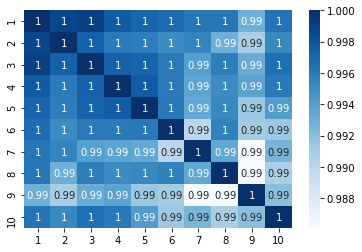

In [330]:
sns.heatmap(R, cmap='Blues', annot=True) # annot: 在heatmap中每个方格写入数据

In [331]:
# 求特征值 & 特征向量
W, V = np.linalg.eig(R)
W_diag = np.diag(W)
V = V.T # 这里需要转置
print('特征值: ', W)

# 定义"判断多重共线性"的函数
# 参数: (X_list: 设计矩阵 X, thres_vif: VIF 方法判断多重共线性的阈值, thres_kappa: 特征值方法判断多重共线性的阈值)
def judge_col(X_list, thres_vif, thres_kappa): 
    var_num = X_list.shape[1]
    print('VIF方法判断结果(阈值为 %d): '% thres_vif)
    vif = [variance_inflation_factor(X_list, i) for i in range(var_num)]
    for i in range(var_num):
        if vif[i] >= thres_vif:
            print('设计矩阵 X 存在多重共线性.')
            break
        elif i == var_num-1:
            print('设计矩阵 X 不存在多重共线性.')

    print('\n特征值判定法判断结果(阈值为 %d): '% thres_kappa)
    kappa = []
    for i in range(var_num):
        kappa.append(np.sqrt(max(W) / W[i]))
    if np.max(kappa) >= thres_kappa:
        print('设计矩阵 X 存在多重共线性，其中kappa值为：%.4f'% np.max(kappa))
    else:
        print('设计矩阵 X 不存在多重共线性，其中kappa值为：%.4f'% np.max(kappa))

# 判断多重共线性
X_std1 = X_std[:,1:p+1]
beta_std_hat1 = beta_std_hat[1:p+1]
judge_col(X_std1, 5, 10)


特征值:  [9.95055232e+00 1.69971559e-02 1.21413841e-02 5.77861587e-03
 5.35073424e-03 4.02693965e-03 2.09355621e-04 2.54955283e-03
 8.21463332e-04 1.57247878e-03]
VIF方法判断结果(阈值为 5): 
设计矩阵 X 存在多重共线性.

特征值判定法判断结果(阈值为 10): 
设计矩阵 X 存在多重共线性，其中kappa值为：218.0124


In [332]:
def RR(K = 1):
    # 计算岭估计
    rang1 = []
    for i in range(K):
        rang1.append(i/K)
    coefs_1 = []
    for k in rang1:
        temp1 = np.linalg.inv(X_std1.T @ X_std1 + k * np.eye(p)) @ X_std1.T @ Y_std
        coefs_1.append(temp1)

    # print('参数的数值: ', coefs_1)
    coefs_1 = np.array(coefs_1)
    x1 = range(K)
    for i in range(p):
        plt.plot(x1, coefs_1[:,i], label = 'X%d'%(i+1))
        plt.text(x1[-1], coefs_1[-1,i], '%.4f' % float(coefs_1[-1,i]), fontsize=8)

    plt.legend(loc = 'best')

interact(RR,K=(1,100))

interactive(children=(IntSlider(value=1, description='K', min=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.RR(K=1)>

In [333]:
def RR(K = 1):
    # 调包: linear_model  
    # 初始化一个Ridge Regression
    clf = linear_model.Ridge(fit_intercept=False)

    # 训练模型: 测试不同的lambda取值，获得系数
    rang2 = []
    for i in range(K):
        rang2.append(i/K)
    coefs_2 = []
    for k in rang2:
        clf.set_params(alpha=k)
        clf.fit(X_std1, Y_std)
        coefs_2.append(clf.coef_)

    # print('参数的数值: ', coefs_2)
    x2 = range(K)
    coefs_2 = np.array(coefs_2)
    for i in range(p):
        plt.plot(x2, coefs_2[:,i], label = 'X%d'%(i+1))
        plt.text(x2[-1], coefs_2[-1,i], '%.4f' % float(coefs_2[-1,i]), fontsize=8)

    plt.legend(loc = 'right')

interact(RR,K=(1,100))

interactive(children=(IntSlider(value=1, description='K', min=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.RR(K=1)>

In [334]:
def RR(K = 1):
    clf = linear_model.Ridge(fit_intercept=False)
    
    coefs_3 = []
    num_lambda3 = K
    for k in range(num_lambda3):
        clf.set_params(alpha=np.exp(k-10))
        clf.fit(X_std1, Y_std)
        coefs_3.append(clf.coef_)

    # print('参数的数值：', coefs_3)
    x3 = range(num_lambda3)
    coefs_3 = np.array(coefs_3)
    for i in range(p):
        plt.plot(x3, coefs_3[:,i], label = 'X%d'%(i+1))
        plt.text(x3[-1], coefs_3[-1,i], '%.4f' % float(coefs_3[-1,i]), fontsize=8)

    plt.legend(loc = 'best')

interact(RR,K=(1,30))

interactive(children=(IntSlider(value=1, description='K', max=30, min=1), Output()), _dom_classes=('widget-int…

<function __main__.RR(K=1)>

In [335]:
# 初始化一个Ridge Cross-Validation Regression
clf_cv = linear_model.RidgeCV(fit_intercept=False)
 
# 训练模型
clf_cv.fit(X_std1, Y_std)

k_cv = clf_cv.alpha_
coef_cv = clf_cv.coef_ 
print( 'alpha的数值 : ', clf_cv.alpha_)
print('参数的数值：', clf_cv.coef_)

alpha的数值 :  0.1
参数的数值： [0.09836055 0.09206843 0.09979699 0.10130156 0.09749761 0.09776615
 0.09837664 0.10228175 0.10300073 0.10192511]


In [336]:
# 验证岭估计和最小二乘估计之间的关系
thres_k = int(k_cv * 100)
print(coef_cv)

C1 = X_std1.T @ X_std1
C2 = np.linalg.inv(C1 + k_cv * np.eye(p))
C3 = C2 @ C1
print(C3 @ beta_std_hat1)

diff = coef_cv - C3 @ beta_std_hat1
print('差异: ', diff)


[0.09836055 0.09206843 0.09979699 0.10130156 0.09749761 0.09776615
 0.09837664 0.10228175 0.10300073 0.10192511]
[0.09836055 0.09206843 0.09979699 0.10130156 0.09749761 0.09776615
 0.09837664 0.10228175 0.10300073 0.10192511]
差异:  [-3.46944695e-16 -4.78783679e-15  3.60822483e-16  5.27355937e-16
 -1.04083409e-15 -2.01227923e-15 -1.72084569e-15  1.33226763e-15
 -1.38777878e-15 -3.88578059e-16]


岭参数为:  0.049787068367863944
对应的岭估计:  [0.09797931 0.08597558 0.10067103 0.10349848 0.09627766 0.09694984
 0.09856387 0.10580104 0.1067853  0.10487532]


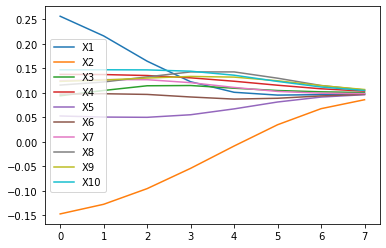

In [337]:
coefs_4 = []
thres_vif = 5
num_lambda4 = 30
judge = True
for k in range(num_lambda4):
    cnt = 0
    C = np.linalg.inv(C1 + np.exp(k-10) * np.eye(p)) @ C1 @np.linalg.inv(C1 + np.exp(k-10) * np.eye(p))
    # print(k, C)
    temp4 = np.linalg.inv(X_std1.T @ X_std1 + np.exp(k-10) * np.eye(p)) @ X_std1.T @ Y_std
    coefs_4.append(temp4)
    
    # 给定 k, 使得所有方差扩大因子 C[j][j] <= thres_vif
    for j in range(p):
        if C[j][j] < thres_vif:
            cnt += 1
        else:
            break
    if cnt == p:
        k4 = np.exp(k-10)
        print('岭参数为: ', np.exp(k-10))
        print('对应的岭估计: ', temp4)
        break

coef_4 = temp4
# print('参数的数值：', coefs_4)
x4 = range(k+1)  # 以 k 作为横坐标
# x4 = []  # 以 np.exp(k) 作为横坐标
# for i in range(k+1):
#      x4.append(np.exp(i-10))
coefs_4 = np.array(coefs_4)
for i in range(p):
    plt.plot(x4, coefs_4[:,i], label = 'X%d'%(i+1))

plt.legend(loc = 'best')
plt.show()

In [338]:
SSE = sum((Y_std - Y_std_hat) ** 2)
sigma2 = SSE / (n - p - 1)
sigma = np.sqrt(sigma2)

Z = X_std1 @ V.T
alpha_hat = np.linalg.inv(W_diag) @ Z.T @ Y_std
# print(alpha_hat)

k_HK = sigma2 / max(alpha_hat**2)
k5 = k_HK
print('岭参数 k_HK: ', k5)
coef_5 = np.linalg.inv(X_std1.T @ X_std1 + k5 * np.eye(p)) @ X_std1.T @ Y_std
print('对应的岭估计: ', coef_5)


岭参数 k_HK:  9.810079636913347e-05
对应的岭估计:  [ 0.2269792  -0.13293067  0.10215909  0.13751099  0.05110871  0.09813563
  0.12659079  0.12037303  0.12536112  0.1470881 ]


In [339]:
thres_diff = 0.2
beta_compress = beta_std_hat1.T @ beta_std_hat1 - sigma2 * sum(1/W)
if beta_compress <= 0:
    k6 = 0
    temp6 = []
    print('k = 0, 不对最小二乘估计进行压缩.')
else:
    print('Q: ', beta_compress)
    coefs_6 = []
    num_lambda6 = 30
    for k in range(num_lambda6):
        temp6 = np.linalg.inv(X_std1.T @ X_std1 + np.exp(k-10) * np.eye(p)) @ X_std1.T @ Y_std
        beta_k_compress = temp6.T @ temp6
        if abs(beta_compress-beta_k_compress) < thres_diff:
            k6 = np.exp(k-10)
            print('岭参数为: ', k6)
            print('对应的岭估计: ', temp6)
            break
coef_6 = temp6

Q:  0.13727863062464785
岭参数为:  4.5399929762484854e-05
对应的岭估计:  [ 0.25628586 -0.14696565  0.09401904  0.13770916  0.05282923  0.09738181
  0.12484073  0.11584388  0.12339744  0.14698696]


In [340]:
beta_rr = coef_4
print('原始的最小二乘估计 = ', beta_hat[1:p+1])
print('标准化后的最小二乘估计 = ', beta_std_hat1)

print('原始 beta = ', beta[1:p+1])
print('岭估计 = ', beta_rr)
print('还原岭估计 = ', beta_rr *  np.sqrt(Y_L) / np.sqrt(X_L))


原始的最小二乘估计 =  [15.91720387 -8.91283587  4.58225724  7.40249407  2.9158542   5.1110936
  6.89220758  6.1967428   6.77035094  8.11402424]
标准化后的最小二乘估计 =  [ 0.29317419 -0.16297807  0.08254587  0.13756679  0.05554162  0.0957215
  0.12184902  0.11087377  0.12113044  0.1468422 ]
原始 beta =  [ 1  2  3  4  5  6  7  8  9 10]
岭估计 =  [0.09797931 0.08597558 0.10067103 0.10349848 0.09627766 0.09694984
 0.09856387 0.10580104 0.1067853  0.10487532]
还原岭估计 =  [5.31955662 4.70177504 5.58841498 5.56927211 5.05443663 5.17668134
 5.57511801 5.91322758 5.96855736 5.79507033]
